In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [96]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import AgglomerativeClustering
import scipy.stats
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch

In [97]:
def plot_print_confusion(y_test,y_predict):
    print(classification_report(y_test, y_predict))
    mat1 = confusion_matrix(y_test, y_predict)
    plt.figure(1)
    sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [98]:
frame = pd.read_csv("test.csv")
frame = frame.loc[:,frame.isnull().mean() <0.3]

In [99]:
for col in frame.columns:
    frame[col].fillna(frame[col].median(), inplace=True)

In [100]:
Y = frame.loc[:,'class']
X = frame.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [101]:
# ('var',VarianceThreshold(threshold=0.90*(1-0.90)))var
numeric_transformer = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99))])
X_train_tr = numeric_transformer.fit_transform(X_train)
X_test_tr = numeric_transformer.transform(X_test)

In [102]:
numeric_transformer_ld = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis())])
X_train_ld = numeric_transformer_ld.fit_transform(X_train,y_train)
X_test_ld = numeric_transformer_ld.transform(X_test)

In [103]:
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [104]:
all_test = [X_test_tr,X_test_ld,X_test_]
all_train = [X_train_tr,X_train_ld,X_train_]
all_ = ['PCA','LDA','normalized']

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        44
         1.0       0.60      0.90      0.72        10
         2.0       0.75      0.32      0.44        19
         3.0       0.33      0.33      0.33         9

    accuracy                           0.73        82
   macro avg       0.63      0.63      0.60        82
weighted avg       0.73      0.73      0.71        82



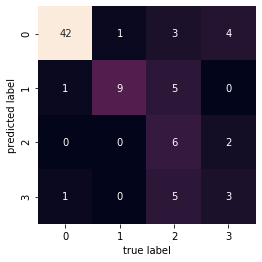

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71        44
         1.0       0.00      0.00      0.00        10
         2.0       1.00      0.11      0.19        19
         3.0       0.00      0.00      0.00         9

    accuracy                           0.56        82
   macro avg       0.39      0.28      0.23        82
weighted avg       0.53      0.56      0.42        82



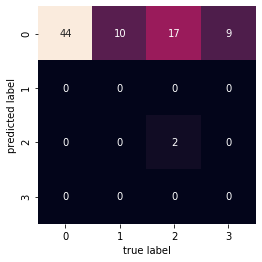

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82        44
         1.0       0.83      0.50      0.62        10
         2.0       0.75      0.16      0.26        19
         3.0       0.29      0.44      0.35         9

    accuracy                           0.66        82
   macro avg       0.65      0.51      0.51        82
weighted avg       0.70      0.66      0.62        82



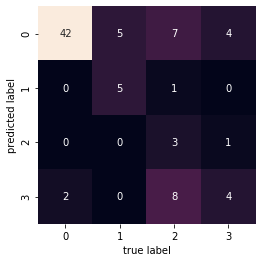

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86        44
         1.0       0.62      0.80      0.70        10
         2.0       0.86      0.32      0.46        19
         3.0       0.36      0.44      0.40         9

    accuracy                           0.72        82
   macro avg       0.66      0.62      0.61        82
weighted avg       0.74      0.72      0.70        82



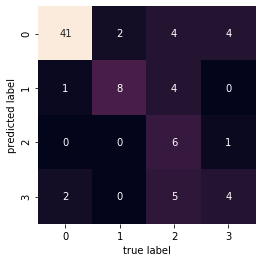

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87        44
         1.0       0.50      0.50      0.50        10
         2.0       0.73      0.42      0.53        19
         3.0       0.38      0.33      0.35         9

    accuracy                           0.71        82
   macro avg       0.60      0.55      0.56        82
weighted avg       0.70      0.71      0.69        82



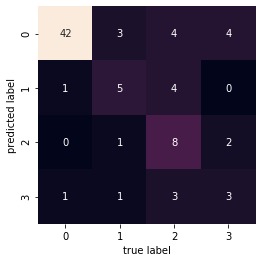

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.72      0.98      0.83        44
         1.0       0.57      0.40      0.47        10
         2.0       1.00      0.16      0.27        19
         3.0       0.25      0.33      0.29         9

    accuracy                           0.65        82
   macro avg       0.63      0.47      0.46        82
weighted avg       0.71      0.65      0.60        82



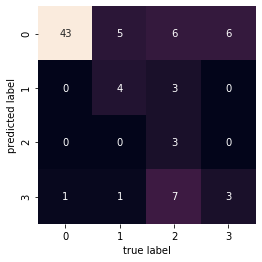

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86        44
         1.0       0.50      0.40      0.44        10
         2.0       0.70      0.37      0.48        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.68        82
   macro avg       0.57      0.51      0.53        82
weighted avg       0.67      0.68      0.66        82



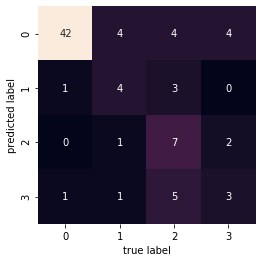

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        44
         1.0       0.50      0.50      0.50        10
         2.0       0.64      0.37      0.47        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.70        82
   macro avg       0.56      0.54      0.54        82
weighted avg       0.68      0.70      0.68        82



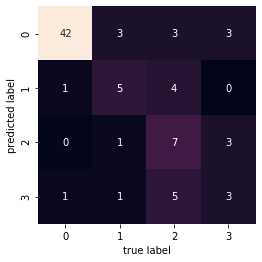

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.62      1.00      0.77        10
         2.0       0.83      0.26      0.40        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.66      0.66      0.61        82
weighted avg       0.76      0.73      0.71        82



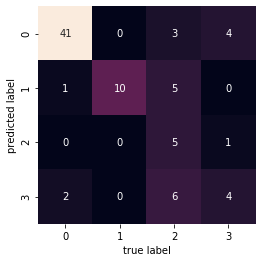

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        44
         1.0       0.62      1.00      0.77        10
         2.0       0.80      0.21      0.33        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.72        82
   macro avg       0.65      0.65      0.59        82
weighted avg       0.75      0.72      0.69        82



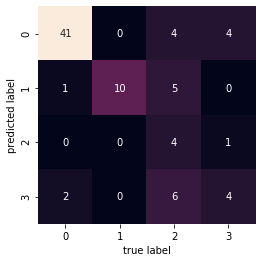

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.85        44
         1.0       0.58      0.70      0.64        10
         2.0       0.80      0.21      0.33        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.68        82
   macro avg       0.62      0.57      0.55        82
weighted avg       0.71      0.68      0.65        82



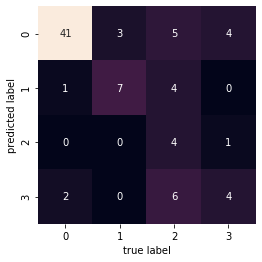

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        44
         1.0       0.60      0.30      0.40        10
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         9

    accuracy                           0.57        82
   macro avg       0.29      0.33      0.28        82
weighted avg       0.38      0.57      0.44        82



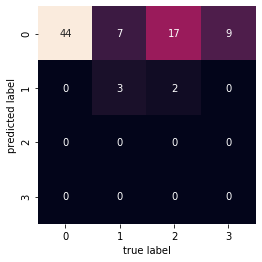

In [121]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel, decision_function_shape='ovo')
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("==================================================================================")

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



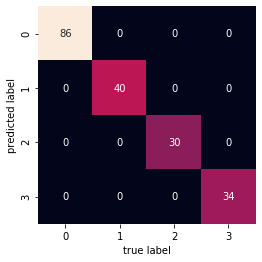

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        86
         1.0       1.00      0.88      0.93        40
         2.0       1.00      0.90      0.95        30
         3.0       1.00      0.79      0.89        34

    accuracy                           0.92       190
   macro avg       0.96      0.89      0.92       190
weighted avg       0.93      0.92      0.92       190



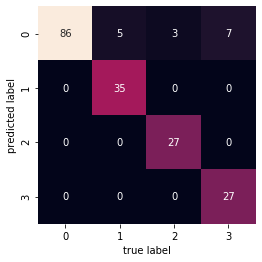

Kernel: rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



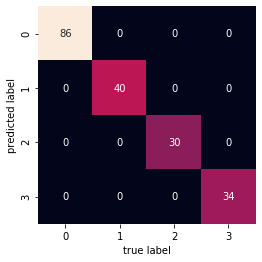

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91        86
         1.0       0.92      0.85      0.88        40
         2.0       0.83      0.63      0.72        30
         3.0       0.77      0.79      0.78        34

    accuracy                           0.85       190
   macro avg       0.84      0.81      0.82       190
weighted avg       0.85      0.85      0.85       190



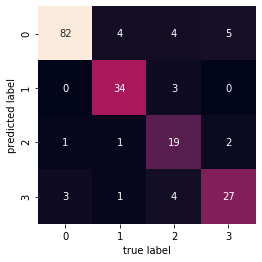

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93        86
         1.0       0.97      0.80      0.88        40
         2.0       0.77      0.90      0.83        30
         3.0       0.93      0.74      0.82        34

    accuracy                           0.88       190
   macro avg       0.89      0.85      0.86       190
weighted avg       0.89      0.88      0.88       190



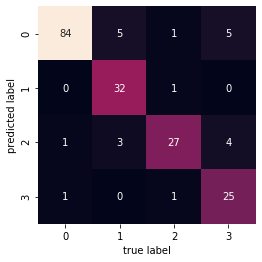

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        86
         1.0       0.97      0.78      0.86        40
         2.0       0.79      0.63      0.70        30
         3.0       0.86      0.71      0.77        34

    accuracy                           0.84       190
   macro avg       0.86      0.78      0.81       190
weighted avg       0.85      0.84      0.84       190



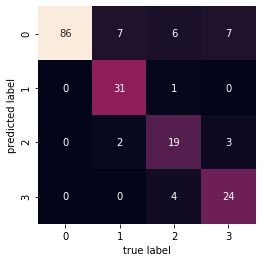

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        86
         1.0       0.97      0.80      0.88        40
         2.0       0.78      0.93      0.85        30
         3.0       0.96      0.76      0.85        34

    accuracy                           0.89       190
   macro avg       0.90      0.87      0.88       190
weighted avg       0.90      0.89      0.89       190



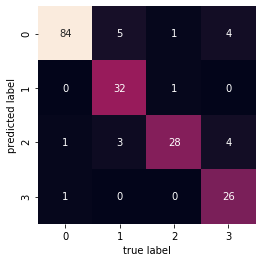

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        86
         1.0       0.94      0.82      0.88        40
         2.0       0.79      0.87      0.83        30
         3.0       0.93      0.79      0.86        34

    accuracy                           0.89       190
   macro avg       0.89      0.86      0.87       190
weighted avg       0.89      0.89      0.89       190



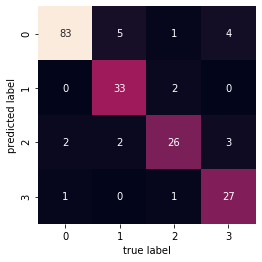

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



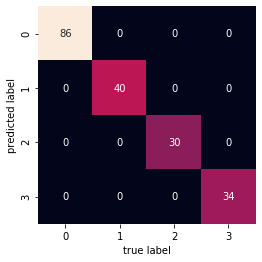

Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



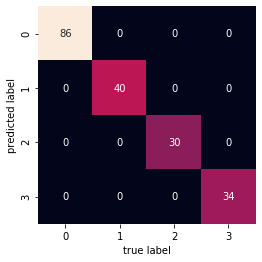

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        86
         1.0       1.00      0.97      0.99        40
         2.0       1.00      0.93      0.97        30
         3.0       1.00      0.94      0.97        34

    accuracy                           0.97       190
   macro avg       0.99      0.96      0.97       190
weighted avg       0.98      0.97      0.97       190



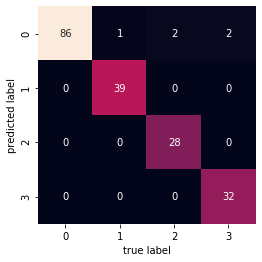

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67        86
         1.0       0.68      0.33      0.44        40
         2.0       0.00      0.00      0.00        30
         3.0       0.00      0.00      0.00        34

    accuracy                           0.52       190
   macro avg       0.30      0.33      0.28       190
weighted avg       0.37      0.52      0.40       190



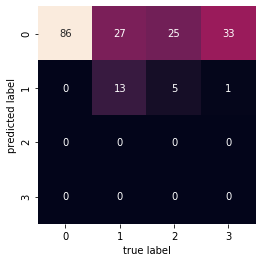

In [106]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        model.fit(train,y_train)
        y_predict = model.predict(train)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("===================================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        44
         1.0       0.62      1.00      0.77        10
         2.0       0.75      0.16      0.26        19
         3.0       0.31      0.44      0.36         9

    accuracy                           0.71        82
   macro avg       0.63      0.63      0.57        82
weighted avg       0.73      0.71      0.67        82



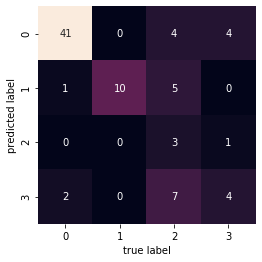

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        44
         1.0       0.53      0.90      0.67        10
         2.0       0.62      0.26      0.37        19
         3.0       0.29      0.44      0.35         9

    accuracy                           0.70        82
   macro avg       0.59      0.62      0.57        82
weighted avg       0.73      0.70      0.69        82



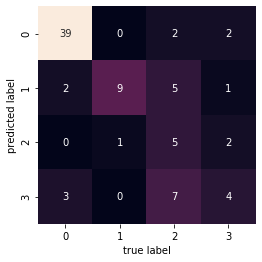

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87        44
         1.0       0.53      0.90      0.67        10
         2.0       0.75      0.16      0.26        19
         3.0       0.27      0.44      0.33         9

    accuracy                           0.67        82
   macro avg       0.60      0.60      0.53        82
weighted avg       0.72      0.67      0.64        82



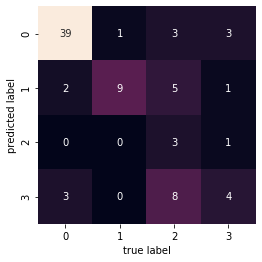

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        44
         1.0       0.50      0.50      0.50        10
         2.0       0.60      0.32      0.41        19
         3.0       0.23      0.33      0.27         9

    accuracy                           0.65        82
   macro avg       0.53      0.51      0.51        82
weighted avg       0.65      0.65      0.64        82



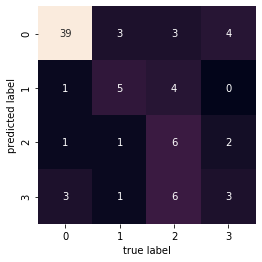

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        44
         1.0       0.50      0.50      0.50        10
         2.0       0.67      0.32      0.43        19
         3.0       0.31      0.44      0.36         9

    accuracy                           0.68        82
   macro avg       0.57      0.55      0.54        82
weighted avg       0.69      0.68      0.67        82



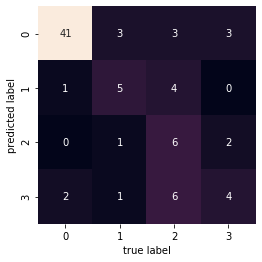

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84        44
         1.0       0.50      0.40      0.44        10
         2.0       0.57      0.21      0.31        19
         3.0       0.27      0.33      0.30         9

    accuracy                           0.65        82
   macro avg       0.52      0.47      0.47        82
weighted avg       0.63      0.65      0.61        82



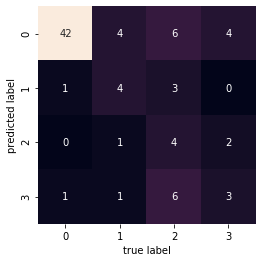

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        44
         1.0       0.64      0.90      0.75        10
         2.0       0.86      0.32      0.46        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.67      0.65      0.62        82
weighted avg       0.76      0.73      0.71        82



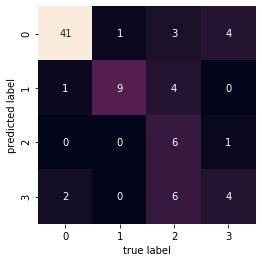

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.60      0.90      0.72        10
         2.0       0.71      0.26      0.38        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.72        82
   macro avg       0.63      0.63      0.59        82
weighted avg       0.73      0.72      0.70        82



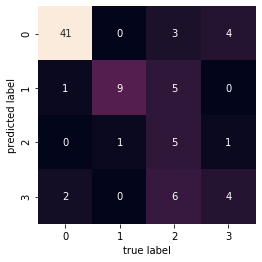

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        44
         1.0       0.64      0.90      0.75        10
         2.0       0.86      0.32      0.46        19
         3.0       0.36      0.44      0.40         9

    accuracy                           0.74        82
   macro avg       0.68      0.65      0.63        82
weighted avg       0.77      0.74      0.72        82



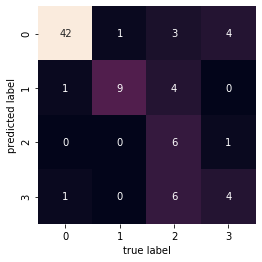

In [107]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("===================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



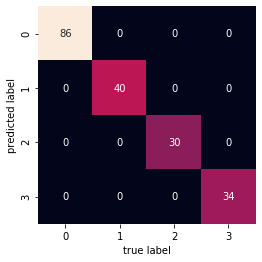

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



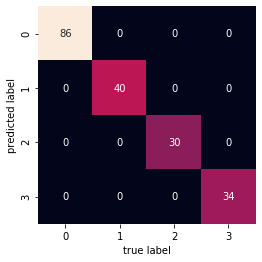

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



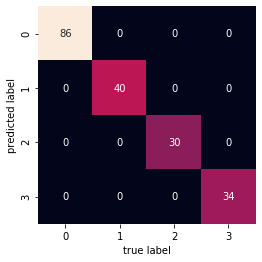

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



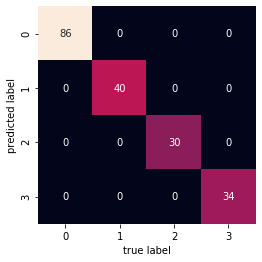

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



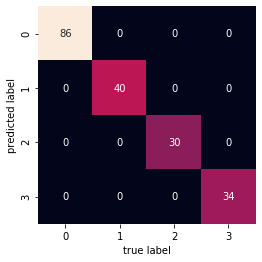

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



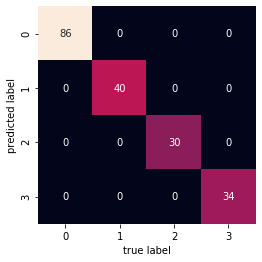

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



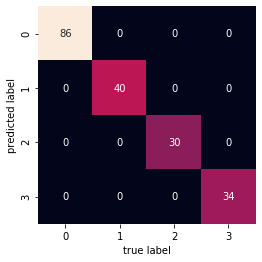

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



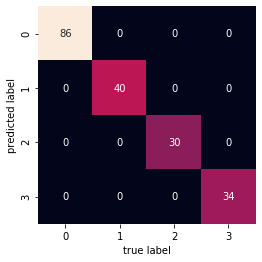

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



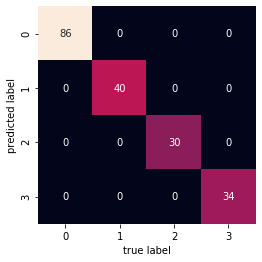

In [108]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(X_train_tr,y_train)
        y_predict = model.predict(X_train_tr)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.86      0.41      0.55        44
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00        19
         3.0       0.13      0.89      0.23         9

    accuracy                           0.32        82
   macro avg       0.25      0.32      0.20        82
weighted avg       0.47      0.32      0.32        82



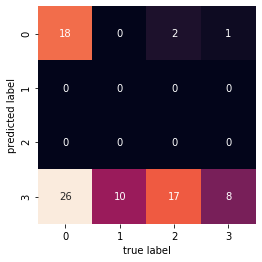

LDA
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87        44
         1.0       0.44      0.40      0.42        10
         2.0       0.70      0.37      0.48        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.68        82
   macro avg       0.56      0.51      0.52        82
weighted avg       0.67      0.68      0.66        82



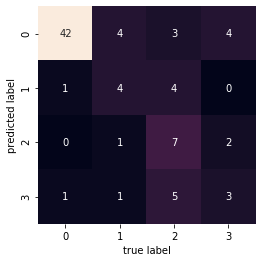

normalized
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        44
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00        19
         3.0       0.11      1.00      0.20         9

    accuracy                           0.11        82
   macro avg       0.03      0.25      0.05        82
weighted avg       0.01      0.11      0.02        82



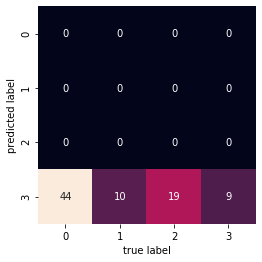

In [109]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("===================================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



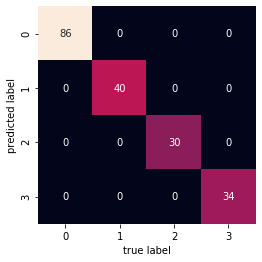

LDA
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        86
         1.0       0.97      0.82      0.89        40
         2.0       0.79      0.90      0.84        30
         3.0       0.90      0.76      0.83        34

    accuracy                           0.89       190
   macro avg       0.89      0.86      0.87       190
weighted avg       0.89      0.89      0.89       190



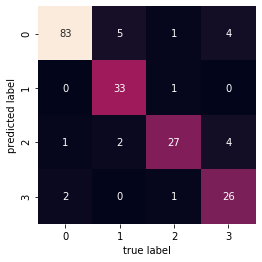

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



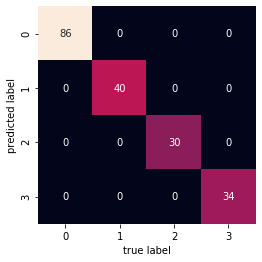

In [110]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.60      0.16      0.25        19
         3.0       0.29      0.44      0.35         9

    accuracy                           0.71        82
   macro avg       0.60      0.63      0.57        82
weighted avg       0.71      0.71      0.67        82



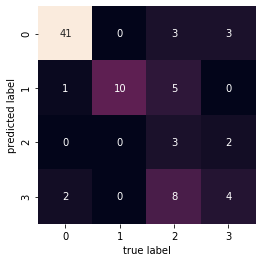

LDA
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        44
         1.0       0.50      0.50      0.50        10
         2.0       0.67      0.32      0.43        19
         3.0       0.31      0.44      0.36         9

    accuracy                           0.68        82
   macro avg       0.57      0.55      0.54        82
weighted avg       0.69      0.68      0.67        82



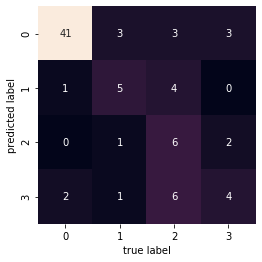

normalized
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.86      0.32      0.46        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.76        82
   macro avg       0.68      0.68      0.64        82
weighted avg       0.78      0.76      0.73        82



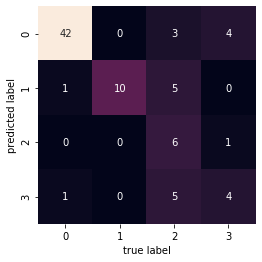

In [111]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("=====================================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



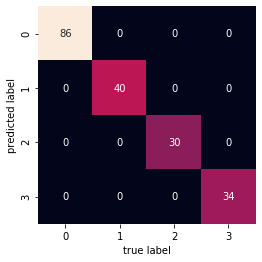

LDA
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        86
         1.0       0.92      0.82      0.87        40
         2.0       0.78      0.83      0.81        30
         3.0       0.90      0.76      0.83        34

    accuracy                           0.88       190
   macro avg       0.87      0.85      0.86       190
weighted avg       0.88      0.88      0.88       190



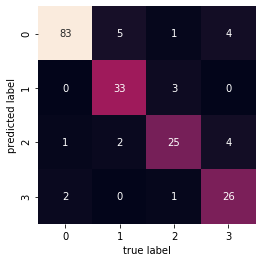

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



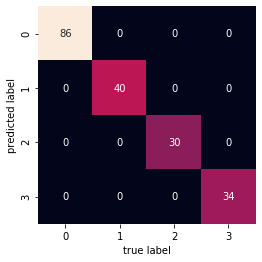

In [112]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77        44
         1.0       1.00      0.10      0.18        10
         2.0       0.75      0.32      0.44        19
         3.0       0.00      0.00      0.00         9

    accuracy                           0.62        82
   macro avg       0.59      0.35      0.35        82
weighted avg       0.63      0.62      0.54        82



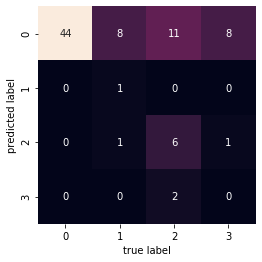

LDA
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85        44
         1.0       0.50      0.40      0.44        10
         2.0       0.60      0.32      0.41        19
         3.0       0.22      0.22      0.22         9

    accuracy                           0.66        82
   macro avg       0.52      0.47      0.48        82
weighted avg       0.63      0.66      0.63        82



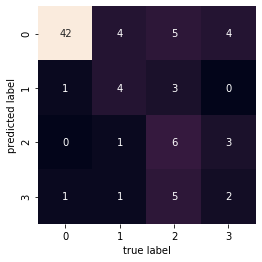

normalized
              precision    recall  f1-score   support

         0.0       0.63      0.98      0.77        44
         1.0       1.00      0.20      0.33        10
         2.0       0.75      0.16      0.26        19
         3.0       0.12      0.11      0.12         9

    accuracy                           0.60        82
   macro avg       0.63      0.36      0.37        82
weighted avg       0.65      0.60      0.53        82



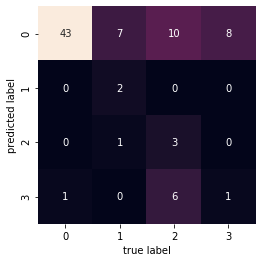

In [113]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("==============================================")

PCA
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.72        86
         1.0       1.00      0.10      0.18        40
         2.0       0.52      0.43      0.47        30
         3.0       0.89      0.24      0.37        34

    accuracy                           0.58       190
   macro avg       0.74      0.44      0.44       190
weighted avg       0.71      0.58      0.51       190



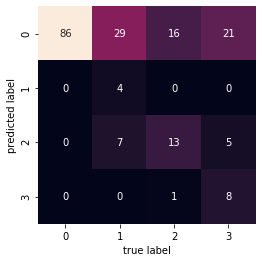

LDA
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        86
         1.0       0.97      0.80      0.88        40
         2.0       0.78      0.93      0.85        30
         3.0       0.92      0.71      0.80        34

    accuracy                           0.88       190
   macro avg       0.89      0.85      0.86       190
weighted avg       0.89      0.88      0.88       190



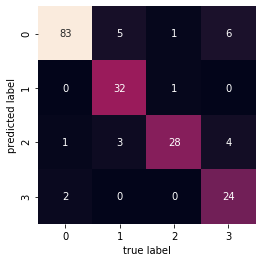

normalized
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73        86
         1.0       1.00      0.23      0.37        40
         2.0       0.61      0.47      0.53        30
         3.0       1.00      0.21      0.34        34

    accuracy                           0.61       190
   macro avg       0.79      0.47      0.49       190
weighted avg       0.74      0.61      0.55       190



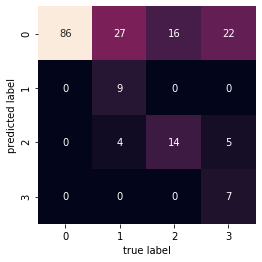

In [114]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)    
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=========================================")

# Over Sampling

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.60      0.90      0.72        10
         2.0       0.89      0.42      0.57        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.76        82
   macro avg       0.69      0.67      0.65        82
weighted avg       0.78      0.76      0.74        82



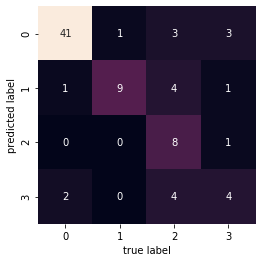

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        44
         1.0       0.67      1.00      0.80        10
         2.0       0.75      0.32      0.44        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.74        82
   macro avg       0.66      0.67      0.63        82
weighted avg       0.76      0.74      0.73        82



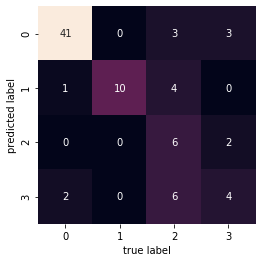

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.67      0.21      0.32        19
         3.0       0.27      0.44      0.33         9

    accuracy                           0.71        82
   macro avg       0.61      0.64      0.58        82
weighted avg       0.74      0.71      0.69        82



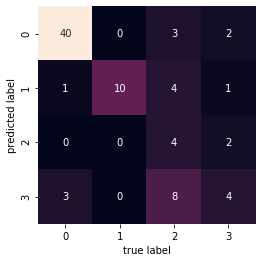

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        44
         1.0       0.55      0.60      0.57        10
         2.0       0.64      0.47      0.55        19
         3.0       0.22      0.22      0.22         9

    accuracy                           0.68        82
   macro avg       0.56      0.55      0.55        82
weighted avg       0.68      0.68      0.68        82



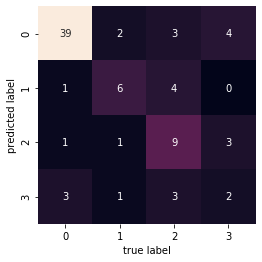

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        44
         1.0       0.50      0.50      0.50        10
         2.0       0.62      0.42      0.50        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.68        82
   macro avg       0.56      0.54      0.54        82
weighted avg       0.67      0.68      0.67        82



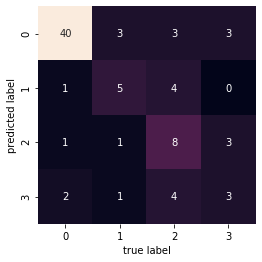

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        44
         1.0       0.44      0.40      0.42        10
         2.0       0.69      0.47      0.56        19
         3.0       0.25      0.22      0.24         9

    accuracy                           0.68        82
   macro avg       0.54      0.51      0.52        82
weighted avg       0.67      0.68      0.67        82



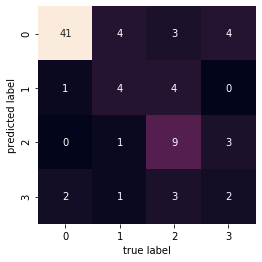

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        44
         1.0       0.67      1.00      0.80        10
         2.0       0.88      0.37      0.52        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.77        82
   macro avg       0.70      0.69      0.66        82
weighted avg       0.79      0.77      0.75        82



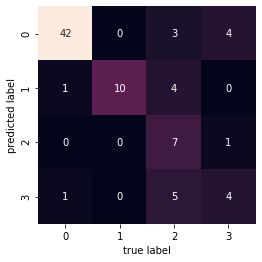

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        44
         1.0       0.67      1.00      0.80        10
         2.0       0.83      0.26      0.40        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.74        82
   macro avg       0.67      0.67      0.62        82
weighted avg       0.77      0.74      0.72        82



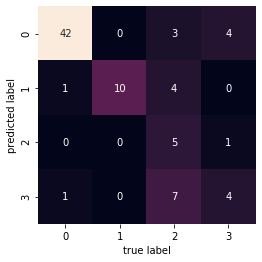

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        44
         1.0       0.64      0.90      0.75        10
         2.0       0.88      0.37      0.52        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.76        82
   macro avg       0.69      0.67      0.65        82
weighted avg       0.78      0.76      0.74        82



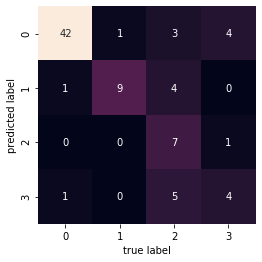

In [115]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        over = SMOTE(sampling_strategy="minority")
        model = MLPClassifier(activation=activation)
        pipeline = Pipeline([('over', over)])
        X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
        model.fit(X_train_tr_ov, y_train_ov)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("======================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



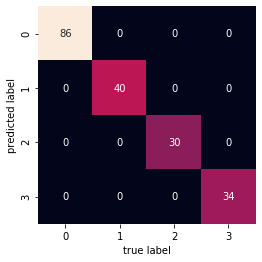

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



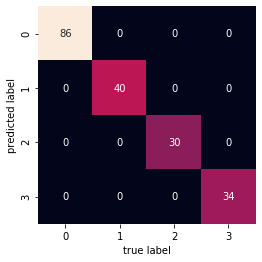

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



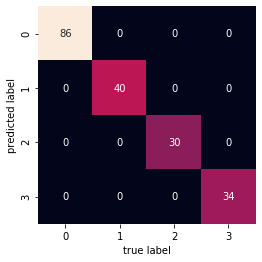

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92        86
         1.0       0.97      0.80      0.88        40
         2.0       0.74      0.93      0.82        30
         3.0       0.93      0.79      0.86        34

    accuracy                           0.88       190
   macro avg       0.88      0.87      0.87       190
weighted avg       0.89      0.88      0.88       190



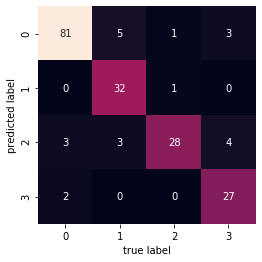

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        86
         1.0       0.97      0.80      0.88        40
         2.0       0.74      0.93      0.82        30
         3.0       0.90      0.76      0.83        34

    accuracy                           0.87       190
   macro avg       0.87      0.86      0.86       190
weighted avg       0.88      0.87      0.87       190



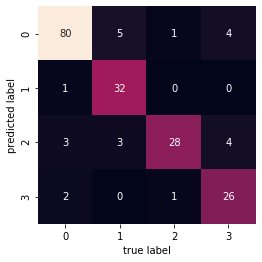

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        86
         1.0       1.00      0.78      0.87        40
         2.0       0.72      0.97      0.83        30
         3.0       0.93      0.76      0.84        34

    accuracy                           0.88       190
   macro avg       0.89      0.86      0.86       190
weighted avg       0.89      0.88      0.88       190



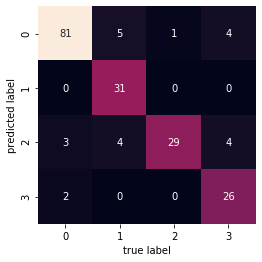

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



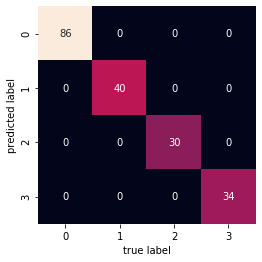

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



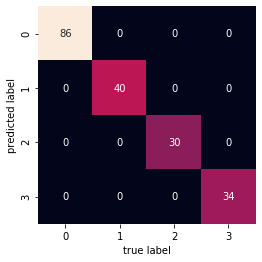

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



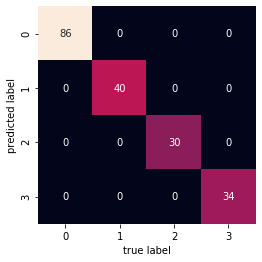

In [116]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        over = SMOTE(sampling_strategy="minority")
        model = MLPClassifier(activation=activation)
        pipeline = Pipeline([('over', over)])
        X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
        model.fit(X_train_tr_ov, y_train_ov)
        y_predict = model.predict(train)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("========================================")

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89        44
         1.0       0.60      0.90      0.72        10
         2.0       0.75      0.32      0.44        19
         3.0       0.33      0.33      0.33         9

    accuracy                           0.73        82
   macro avg       0.63      0.63      0.60        82
weighted avg       0.73      0.73      0.71        82



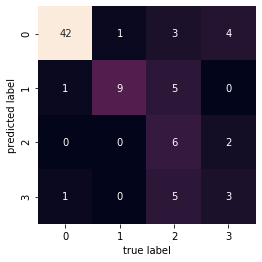

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        44
         1.0       1.00      0.20      0.33        10
         2.0       1.00      0.11      0.19        19
         3.0       0.17      0.11      0.13         9

    accuracy                           0.60        82
   macro avg       0.69      0.35      0.35        82
weighted avg       0.70      0.60      0.51        82



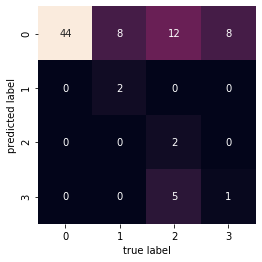

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        44
         1.0       0.64      0.90      0.75        10
         2.0       0.88      0.37      0.52        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.74        82
   macro avg       0.68      0.66      0.64        82
weighted avg       0.77      0.74      0.73        82



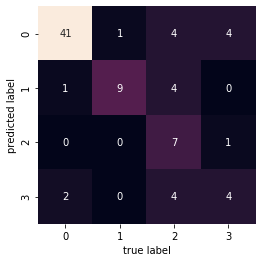

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89        44
         1.0       0.59      1.00      0.74        10
         2.0       0.86      0.32      0.46        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.66      0.67      0.62        82
weighted avg       0.77      0.73      0.72        82



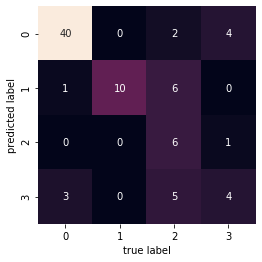

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        44
         1.0       0.50      0.50      0.50        10
         2.0       0.69      0.47      0.56        19
         3.0       0.25      0.33      0.29         9

    accuracy                           0.68        82
   macro avg       0.57      0.55      0.55        82
weighted avg       0.69      0.68      0.68        82



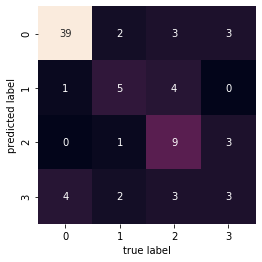

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85        44
         1.0       0.57      0.40      0.47        10
         2.0       1.00      0.16      0.27        19
         3.0       0.27      0.44      0.33         9

    accuracy                           0.66        82
   macro avg       0.65      0.49      0.48        82
weighted avg       0.74      0.66      0.61        82



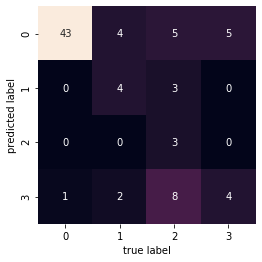

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        44
         1.0       0.50      0.50      0.50        10
         2.0       0.69      0.47      0.56        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.70        82
   macro avg       0.58      0.55      0.56        82
weighted avg       0.69      0.70      0.69        82



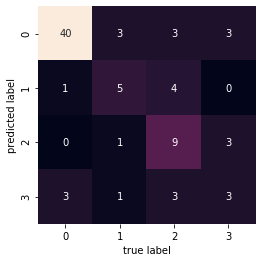

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        44
         1.0       0.50      0.60      0.55        10
         2.0       0.62      0.42      0.50        19
         3.0       0.25      0.33      0.29         9

    accuracy                           0.66        82
   macro avg       0.55      0.55      0.54        82
weighted avg       0.67      0.66      0.66        82



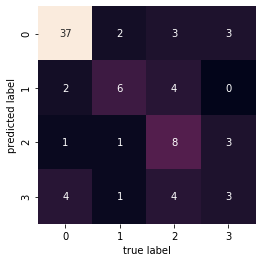

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.62      1.00      0.77        10
         2.0       0.83      0.26      0.40        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.66      0.66      0.61        82
weighted avg       0.76      0.73      0.71        82



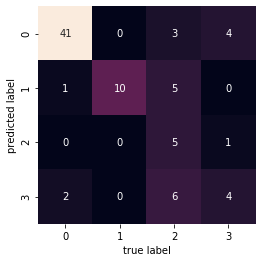

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.62      1.00      0.77        10
         2.0       0.83      0.26      0.40        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.66      0.66      0.61        82
weighted avg       0.76      0.73      0.71        82



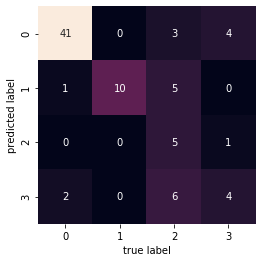

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.62      1.00      0.77        10
         2.0       0.88      0.37      0.52        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.76        82
   macro avg       0.69      0.69      0.65        82
weighted avg       0.78      0.76      0.74        82



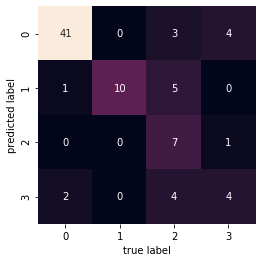

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        44
         1.0       0.56      0.90      0.69        10
         2.0       0.67      0.11      0.18        19
         3.0       0.24      0.44      0.31         9

    accuracy                           0.65        82
   macro avg       0.57      0.58      0.51        82
weighted avg       0.69      0.65      0.61        82



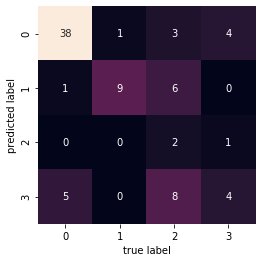

In [117]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel, decision_function_shape='ovo')
        over = SMOTE()
        pipeline = Pipeline([('over', over)])
        X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
        model.fit(X_train_tr_ov, y_train_ov)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("=================================================")

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



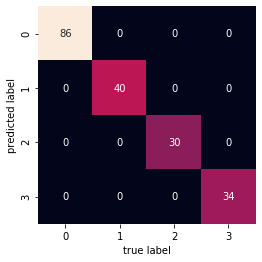

Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



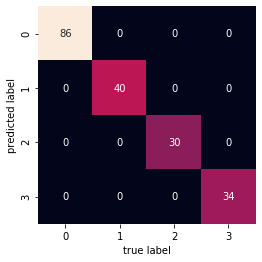

Kernel: rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



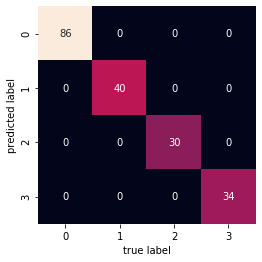

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        86
         1.0       0.93      0.95      0.94        40
         2.0       0.87      0.90      0.89        30
         3.0       0.83      0.88      0.86        34

    accuracy                           0.92       190
   macro avg       0.90      0.92      0.91       190
weighted avg       0.92      0.92      0.92       190



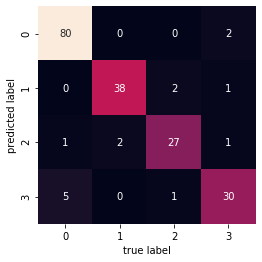

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        86
         1.0       0.86      0.90      0.88        40
         2.0       0.83      0.83      0.83        30
         3.0       0.87      0.79      0.83        34

    accuracy                           0.88       190
   macro avg       0.87      0.86      0.87       190
weighted avg       0.88      0.88      0.88       190



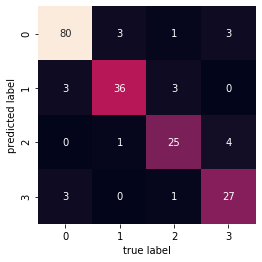

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        86
         1.0       1.00      0.82      0.90        40
         2.0       0.82      0.93      0.87        30
         3.0       1.00      0.74      0.85        34

    accuracy                           0.91       190
   macro avg       0.93      0.87      0.89       190
weighted avg       0.92      0.91      0.90       190



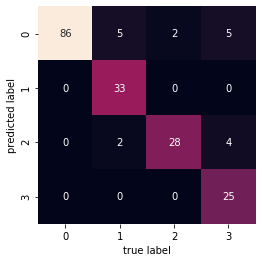

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        86
         1.0       0.92      0.90      0.91        40
         2.0       0.82      0.93      0.87        30
         3.0       0.90      0.79      0.84        34

    accuracy                           0.90       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.90      0.90      0.90       190



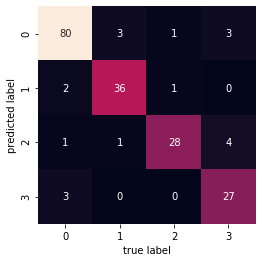

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90        86
         1.0       0.83      0.85      0.84        40
         2.0       0.75      0.90      0.82        30
         3.0       0.84      0.79      0.82        34

    accuracy                           0.86       190
   macro avg       0.84      0.85      0.84       190
weighted avg       0.86      0.86      0.86       190



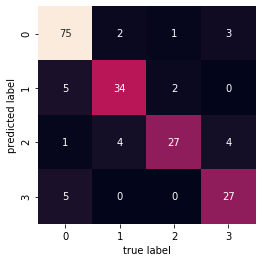

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



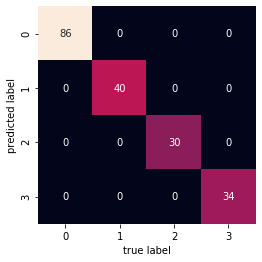

Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



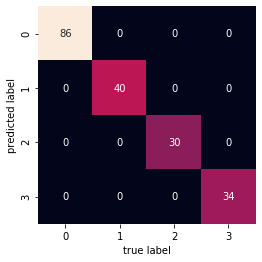

Kernel: rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



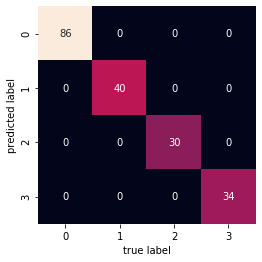

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        86
         1.0       0.79      0.78      0.78        40
         2.0       0.70      0.47      0.56        30
         3.0       0.62      0.74      0.68        34

    accuracy                           0.77       190
   macro avg       0.74      0.72      0.72       190
weighted avg       0.77      0.77      0.76       190



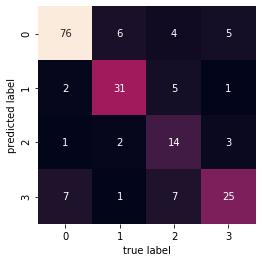

In [118]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        over = SMOTE()
        pipeline = Pipeline([('over', over)])
        X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
        model.fit(X_train_tr_ov, y_train_ov)
        y_predict = model.predict(train)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("==============================================")

PCA
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.71      0.26      0.38        19
         3.0       0.33      0.44      0.38         9

    accuracy                           0.73        82
   macro avg       0.64      0.66      0.61        82
weighted avg       0.75      0.73      0.71        82



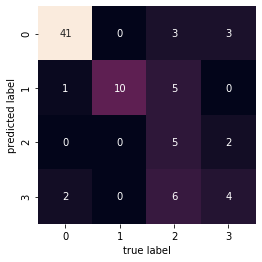

LDA
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84        44
         1.0       0.40      0.40      0.40        10
         2.0       0.67      0.32      0.43        19
         3.0       0.24      0.44      0.31         9

    accuracy                           0.63        82
   macro avg       0.53      0.51      0.50        82
weighted avg       0.67      0.63      0.63        82



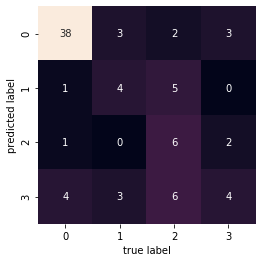

normalized
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.86      0.32      0.46        19
         3.0       0.40      0.44      0.42         9

    accuracy                           0.76        82
   macro avg       0.68      0.68      0.64        82
weighted avg       0.78      0.76      0.73        82



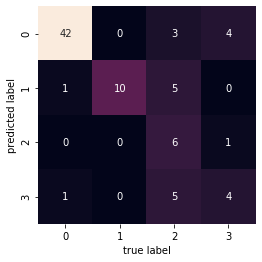

In [119]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    model.fit(X_train_tr_ov, y_train_ov)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print('===========================================')

In [1]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    model.fit(X_train_tr_ov, y_train_ov)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("======================================")

PCA
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        44
         1.0       0.62      1.00      0.77        10
         2.0       0.50      0.11      0.17        19
         3.0       0.27      0.44      0.33         9

    accuracy                           0.70        82
   macro avg       0.57      0.62      0.54        82
weighted avg       0.69      0.70      0.65        82



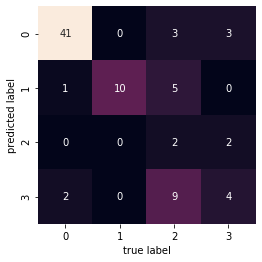

LDA
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        44
         1.0       0.46      0.60      0.52        10
         2.0       0.56      0.26      0.36        19
         3.0       0.27      0.44      0.33         9

    accuracy                           0.63        82
   macro avg       0.53      0.54      0.51        82
weighted avg       0.66      0.63      0.63        82



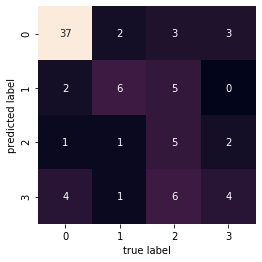

normalized
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.62      1.00      0.77        10
         2.0       0.86      0.32      0.46        19
         3.0       0.36      0.44      0.40         9

    accuracy                           0.74        82
   macro avg       0.67      0.67      0.63        82
weighted avg       0.77      0.74      0.72        82



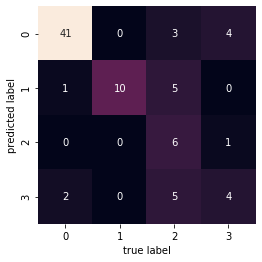

In [64]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = LogisticRegression()
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    model.fit(X_train_tr_ov, y_train_ov)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("=========================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



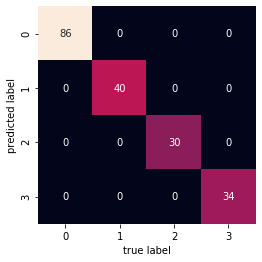

LDA
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        86
         1.0       0.89      0.85      0.87        40
         2.0       0.75      0.90      0.82        30
         3.0       0.82      0.79      0.81        34

    accuracy                           0.86       190
   macro avg       0.84      0.86      0.85       190
weighted avg       0.87      0.86      0.86       190



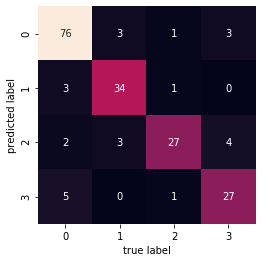

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



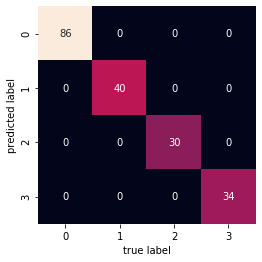

In [65]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)    
    model = LogisticRegression()
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    model.fit(X_train_tr_ov, y_train_ov)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=========================================")

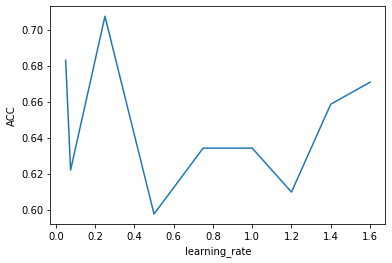

In [66]:
list1 = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.2, 1.4, 1.6]  
ACC = []
list1 = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.2, 1.4, 1.6]
for learning_rate in list1:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=20, max_depth=5, random_state=2)
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(X_train_tr, y_train)
    gb_clf.fit(X_train_tr_ov, y_train_ov)
    ACC.append((gb_clf.score(X_test_tr, y_test)))

plt.plot(list1,ACC)
plt.ylabel('ACC')
plt.xlabel('learning_rate')
plt.show()

In [67]:
# for train, test, which,f in zip(all_train,all_test,all_,[99,3,1269]):
#     print(which)
#     gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.7, max_features=f, max_depth=5, random_state=2)
#     X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
#     gb_clf.fit(X_train_tr_ov, y_train_ov)
#     y_predict = gb_clf.predict(test)
#     plot_print_confusion(y_test,y_predict)
#     plt.show()
#     print("============================================")

In [68]:
# for train, test, which, f in zip(all_train,all_test,all_):
#     print(which)
#     gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.7, max_features=f, max_depth=5, random_state=2)
#     X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
#     gb_clf.fit(X_train_tr_ov, y_train_ov)
#     y_predict = gb_clf.predict(train)
#     plot_print_confusion(y_train,y_predict)
#     plt.show()
#     print("========================================")

PCA
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        44
         1.0       0.50      0.50      0.50        10
         2.0       0.50      0.37      0.42        19
         3.0       0.29      0.22      0.25         9

    accuracy                           0.65        82
   macro avg       0.51      0.49      0.50        82
weighted avg       0.62      0.65      0.63        82



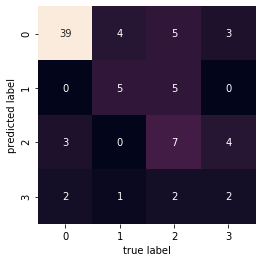

LDA
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        44
         1.0       0.42      0.50      0.45        10
         2.0       0.62      0.42      0.50        19
         3.0       0.30      0.33      0.32         9

    accuracy                           0.67        82
   macro avg       0.54      0.54      0.53        82
weighted avg       0.67      0.67      0.67        82



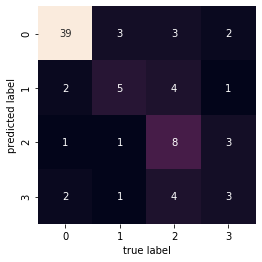

normalized
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        44
         1.0       0.53      0.80      0.64        10
         2.0       0.50      0.26      0.34        19
         3.0       0.18      0.22      0.20         9

    accuracy                           0.63        82
   macro avg       0.50      0.53      0.50        82
weighted avg       0.63      0.63      0.62        82



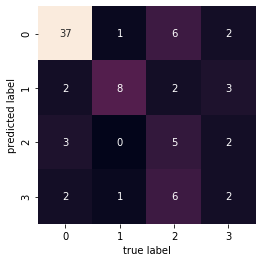

In [69]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)    
    model = tree.DecisionTreeClassifier()
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("==============================================")

PCA
              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75        44
         1.0       0.45      0.50      0.48        10
         2.0       0.25      0.11      0.15        19
         3.0       0.23      0.56      0.32         9

    accuracy                           0.54        82
   macro avg       0.43      0.47      0.42        82
weighted avg       0.56      0.54      0.53        82



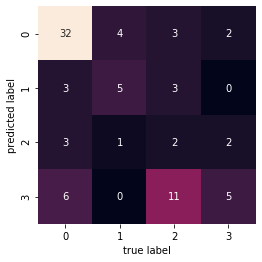

LDA
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        44
         1.0       0.40      0.60      0.48        10
         2.0       0.58      0.37      0.45        19
         3.0       0.43      0.33      0.38         9

    accuracy                           0.67        82
   macro avg       0.56      0.55      0.54        82
weighted avg       0.67      0.67      0.66        82



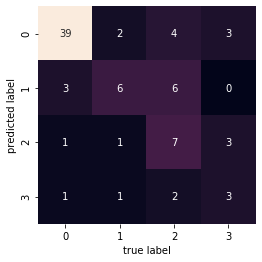

normalized
              precision    recall  f1-score   support

         0.0       0.76      0.64      0.69        44
         1.0       0.39      0.70      0.50        10
         2.0       0.36      0.21      0.27        19
         3.0       0.00      0.00      0.00         9

    accuracy                           0.48        82
   macro avg       0.38      0.39      0.36        82
weighted avg       0.54      0.48      0.49        82



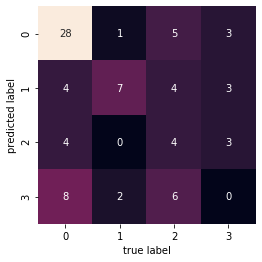

In [70]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = tree.DecisionTreeClassifier()
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    model.fit(X_train_tr_ov, y_train_ov)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("===========================================")
    

In [71]:
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    X_train_tr = numeric_transformer.fit_transform(X_train)
    X_test_tr = numeric_transformer.transform(X_test)
    # fit model
    model = SVC()
    model.fit(X_train_tr, y_train)
    # evaluate model
    yhat = model.predict(X_test_tr)
    # store
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.680


              precision    recall  f1-score   support

         0.0       0.70      0.95      0.80       130
         1.0       0.72      0.46      0.56        50
         2.0       0.63      0.45      0.52        49
         3.0       0.59      0.40      0.47        43

    accuracy                           0.68       272
   macro avg       0.66      0.56      0.59       272
weighted avg       0.67      0.68      0.66       272



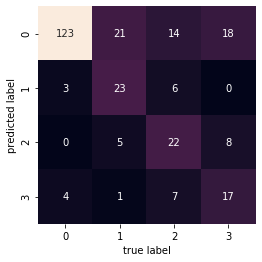

In [72]:
plot_print_confusion(y_true,y_pred)

In [73]:
# cv = LeaveOneOut()
# # enumerate splits
# y_true, y_pred = list(), list()
# i = 0
# for train_ix, test_ix in cv.split(X):
#     # split data
#     X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
#     y_train, y_test = Y.iloc[train_ix], Y.iloc[test_ix]
#     X_train_tr = numeric_transformer.fit_transform(X_train)
#     X_test_tr = numeric_transformer.transform(X_test)
#     # fit model
#     #model = SVC()
#     kernel = 1.0 * RBF(1.0)
#     model = GaussianProcessClassifier(kernel=kernel)
#     over = SMOTE()
#     pipeline = Pipeline([('over', over)])
#     X_train_tr_ov, y_train_ov = pipeline.fit_resample(X_train_tr, y_train)
#     model.fit(X_train_tr_ov, y_train_ov)
#     # evaluate model
#     yhat = model.predict(X_test_tr)
#     # store
#     y_true.append(y_test.iloc[0])
#     y_pred.append(yhat[0])
#     print(i)
#     i += 1
# # calculate accuracy
# acc = accuracy_score(y_true, y_pred)
# print('Accuracy: %.3f' % acc)

In [74]:
import scipy.stats
def find_permutation(n_clusters, real_labels, plabels):
    permutation = []
    for i in range(0,n_clusters):
        idx = plabels == i
        new_labels = scipy.stats.mode(real_labels[idx])[0][0]
        permutation.append(new_labels)
    return permutation

In [75]:
data_tr = numeric_transformer.fit_transform(frame.drop(['class'], axis=1))
data_tr = pd.DataFrame(data_tr)

In [76]:
hc = AgglomerativeClustering(n_clusters = 4)
y_hc = hc.fit_predict(data_tr)

In [77]:
permutation = find_permutation(4, Y.values, y_hc)
y_pred = [ permutation[label] for label in y_hc]

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77       130
         1.0       0.51      0.38      0.44        50
         2.0       0.44      0.55      0.49        49
         3.0       0.00      0.00      0.00        43

    accuracy                           0.60       272
   macro avg       0.40      0.46      0.42       272
weighted avg       0.49      0.60      0.53       272



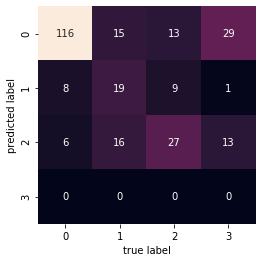

In [78]:
plot_print_confusion(Y.values,y_pred)
plt.show()

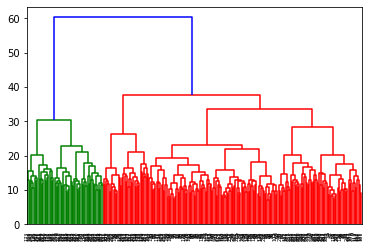

In [79]:
dendrogram = sch.dendrogram(sch.linkage(data_tr, method="ward"))
plt.show()

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77       130
         1.0       0.51      0.38      0.44        50
         2.0       0.44      0.55      0.49        49
         3.0       0.00      0.00      0.00        43

    accuracy                           0.60       272
   macro avg       0.40      0.46      0.42       272
weighted avg       0.49      0.60      0.53       272



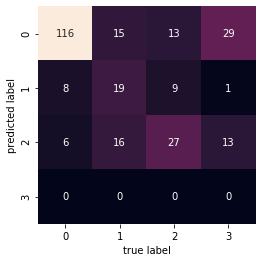

In [80]:
hc = AgglomerativeClustering(n_clusters = 4)
y_hc = hc.fit_predict(data_tr)
permutation = find_permutation(4, Y.values, y_hc)
y_pred = [ permutation[label] for label in y_hc]
plot_print_confusion(Y.values,y_pred)
plt.show()